<a href="https://colab.research.google.com/github/Ankit123trk/Advance-Artificial-Intelligence-practical-/blob/main/bfs%2Cdfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

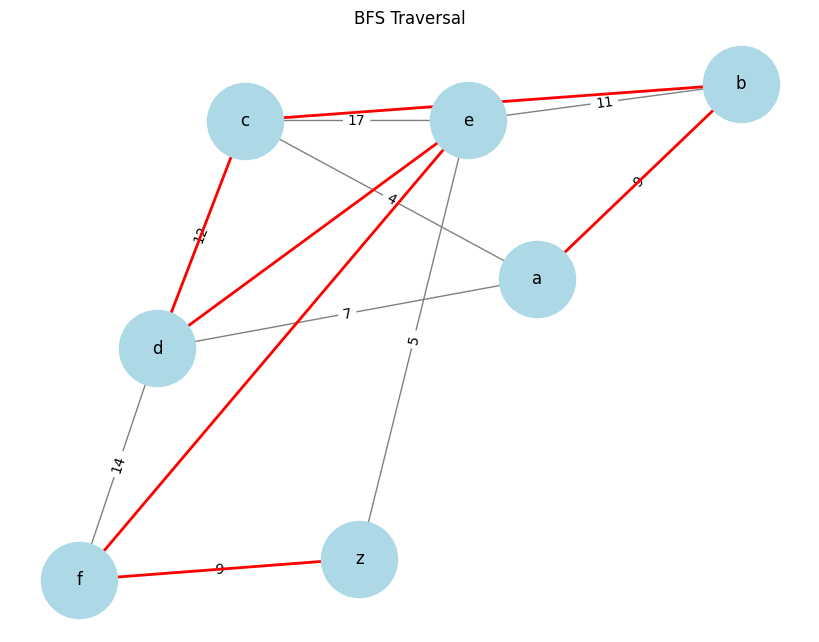

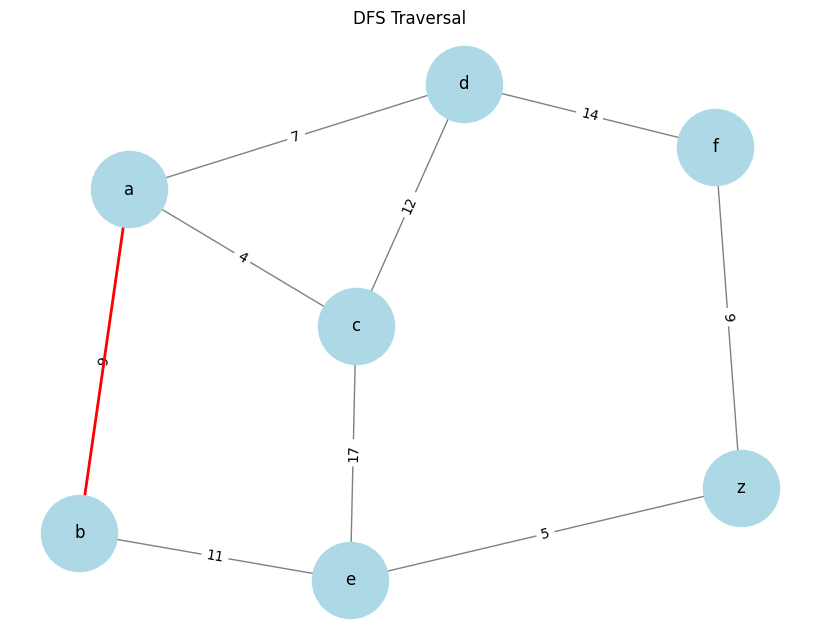

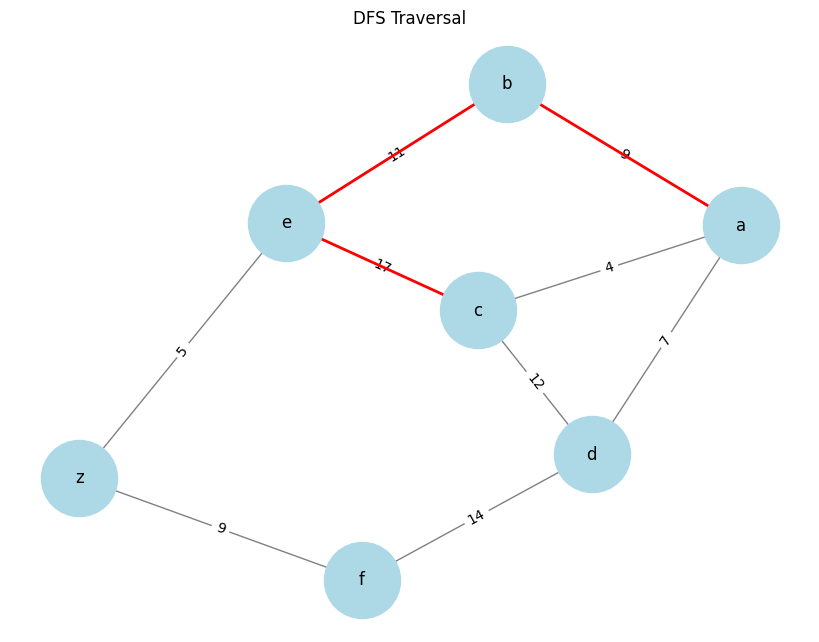

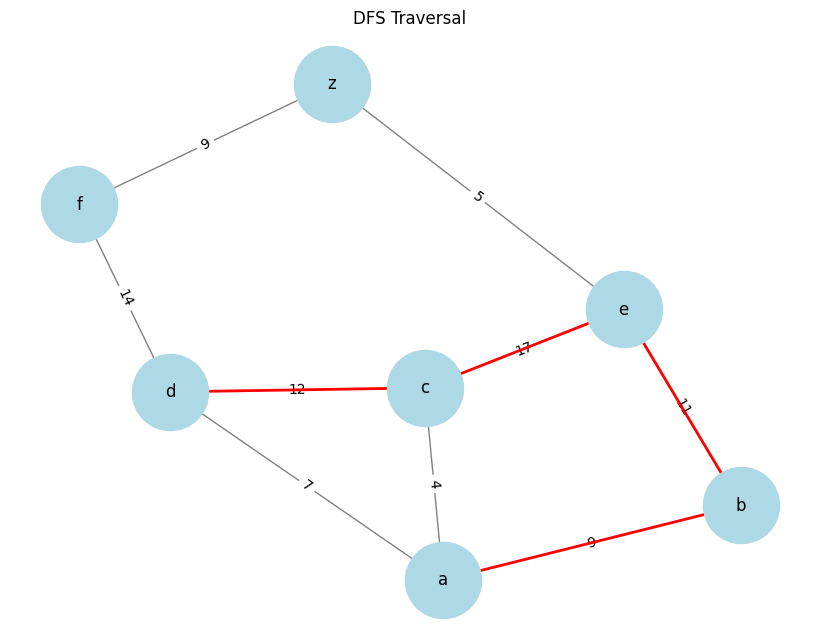

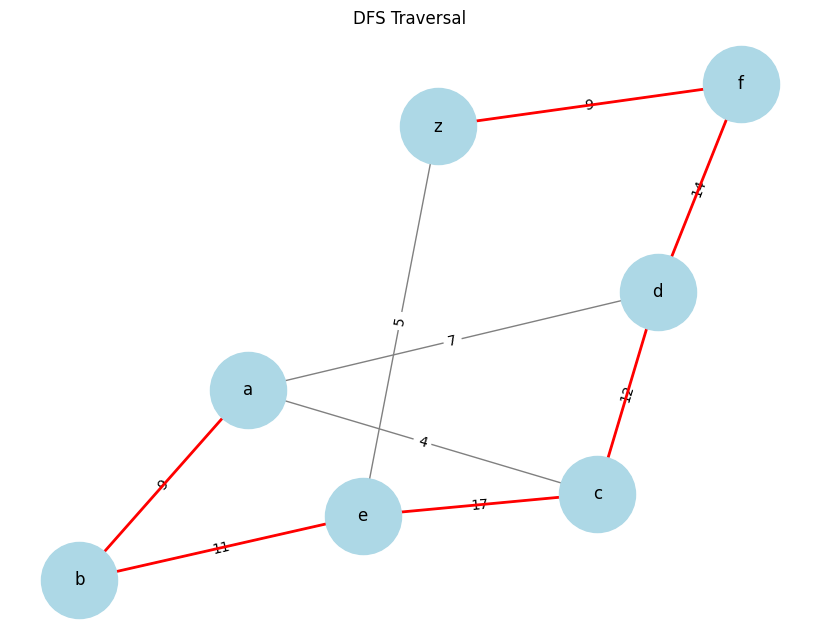

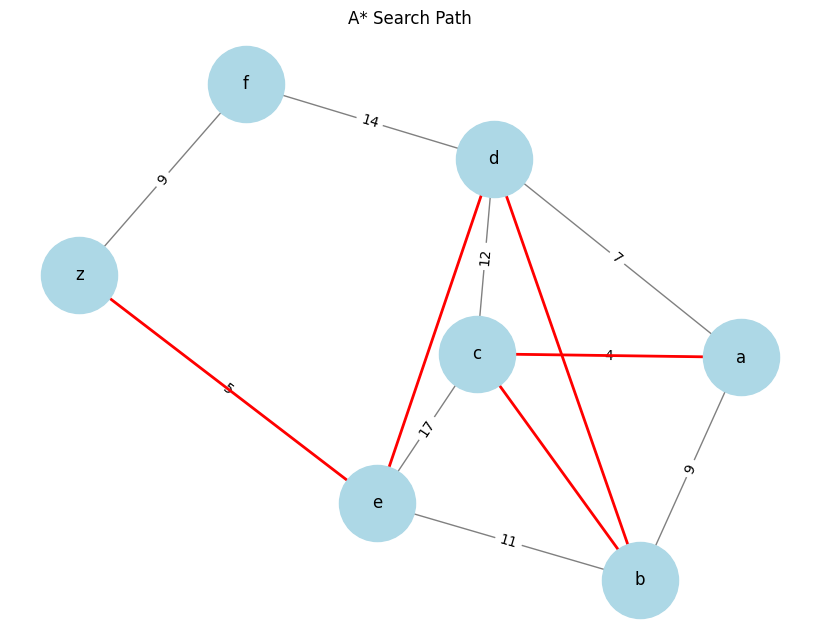

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue

graph = {
    'a': {'b': 9, 'c': 4, 'd': 7},
    'b': {'a': 9, 'e': 11},
    'c': {'a': 4, 'd': 12, 'e': 17},
    'd': {'a': 7, 'c': 12, 'f': 14},
    'e': {'b': 11, 'c': 17, 'z': 5},
    'f': {'d': 14, 'z': 9},
    'z': {'e': 5, 'f': 9}
}

heuristic = {
    'a': 21, 'b': 14, 'c': 18, 'd': 18, 'e': 5, 'f': 8, 'z': 0
}

def draw_graph(path, title):
    G = nx.Graph()
    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path:
        edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)

    plt.title(title)
    plt.show()

def bfs(start):
    visited = set()
    queue = [start]
    path = []
    while queue:
        node = queue.pop(0)
        if node not in visited:
            path.append(node)
            visited.add(node)
            queue.extend(graph[node].keys())
    draw_graph(path, "BFS Traversal")

def dfs(start, visited=None, path=None):
    if visited is None:
        visited = set()
        path = []
    if start not in visited:
        path.append(start)
        visited.add(start)
        for neighbor in graph[start]:
            dfs(neighbor, visited, path)
    if start == 'a':
        draw_graph(path, "DFS Traversal")

def a_star_search(start, goal):
    open_set = PriorityQueue()
    open_set.put((heuristic[start], start))
    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0
    path = []

    while not open_set.empty():
        _, current = open_set.get()
        path.append(current)
        if current == goal:
            break
        for neighbor, cost in graph[current].items():
            tentative_g_score = g_score[current] + cost
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + heuristic[neighbor]
                open_set.put((f_score, neighbor))
    draw_graph(path, "A* Search Path")

start, goal = 'a', 'z'
bfs(start)
dfs(start)
a_star_search(start, goal)